In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import geopandas as gpd
from datetime import datetime as dt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
import matplotlib.ticker as mticker
%matplotlib inline 

In [2]:
pop=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Summer 2017 REU\\New_York_City_Population_By_Census_Tracts.csv')
ct=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Summer 2017 REU\\census_tracts.csv')
mbt=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Summer 2017 REU\\monthly_by_tract.csv')

In [3]:
mbt.rename(columns=dict(zip(mbt.columns[2:],mbt.columns[2:].str[:-2])),inplace=True)
#getting the columns starting from 2 and getting the 7 digit put of it

In [4]:
mbt.head()

complaint_type created_date  1000100  1000201  1000202  1000500  \
0    Dirty Conditions   2004-01-31      NaN      NaN      NaN      NaN   
1  Water Conservation   2004-01-31      NaN      NaN      NaN      NaN   
2                Snow   2004-01-31      NaN      NaN      NaN      NaN   
3       Water Quality   2004-01-31      NaN      NaN      NaN      NaN   
4          Electrical   2004-01-31      NaN      NaN      NaN      NaN   

   1000600  1000700  1000800  1000900   ...     5027706  5027900  5029102  \
0      NaN      NaN      NaN      NaN   ...         NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN   ...         NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN   ...         NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN   ...         NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN   ...         NaN      NaN      NaN   

   5029103  5029104  5030301  5030302  5031901  5031902  5032300  
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[5 rows x 2165 columns]

In [5]:
mbt['created_date']=pd.to_datetime(mbt['created_date'])
#changing the columns into datetime 
mbt2010=mbt[mbt['created_date'].dt.year==2010]
#dt.year==____ is the extracting datetime out 

In [6]:
smbt2010=mbt2010[mbt2010['complaint_type'].str.match('Sewer')]
smbt2010.head()

complaint_type created_date  1000100  1000201  1000202  1000500  1000600  \
1733          Sewer   2010-01-31      NaN      NaN      1.0      NaN      NaN   
1757          Sewer   2010-02-28      NaN      NaN      1.0      NaN      1.0   
1785          Sewer   2010-03-31      NaN      NaN      2.0      NaN      2.0   
1811          Sewer   2010-04-30      NaN      2.0      1.0      NaN      2.0   
1820          Sewer   2010-05-31      NaN      NaN      NaN      NaN      1.0   

      1000700  1000800  1000900   ...     5027706  5027900  5029102  5029103  \
1733      6.0      NaN      2.0   ...         NaN      1.0      3.0      4.0   
1757      5.0      3.0      5.0   ...         5.0      2.0      4.0      4.0   
1785      NaN      3.0      7.0   ...         NaN      8.0     26.0     24.0   
1811      NaN      1.0      3.0   ...         2.0      2.0      5.0     11.0   
1820      1.0      NaN      3.0   ...         NaN      NaN      6.0      6.0   

      5029104  5030301  5030302  5031901  5031902  5032300  
1733      7.0      1.0      2.0      NaN      3.0      2.0  
1757      6.0      1.0      1.0      1.0      1.0      1.0  
1785     11.0      4.0      6.0      3.0      8.0      1.0  
1811      4.0      NaN      5.0      NaN      2.0      NaN  
1820      7.0      2.0     10.0      3.0      NaN      1.0  

[5 rows x 2165 columns]

In [7]:
nottracts=mbt.columns[~mbt.columns.isin(['complaint_type','created_date'])]
#this is a dataframe with all the tracts

calls2010=smbt2010[nottracts].sum(axis=0)
#sum up all the 2010 tracts 
calls2010.head()

1000100     0.0
1000201     5.0
1000202     9.0
1000500     0.0
1000600    14.0
dtype: float64

In [8]:
pop2010=pop[pop['Year']==2010]

In [9]:
pop2010.head()

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  \
2168   Bronx  2010                 5                 2           100   
2169   Bronx  2010                 5                 2           200   
2170   Bronx  2010                 5                 2           400   
2171   Bronx  2010                 5                 2          1600   
2172   Bronx  2010                 5                 2          1900   

      Population  
2168       11091  
2169        4334  
2170        5503  
2171        5643  
2172        1917

In [10]:
pop2010.sort_values(by='Population',ascending=False).head()

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  \
2502      Bronx  2010                 5                 2         46201   
3312  Manhattan  2010                61                 1          4400   
3404  Manhattan  2010                61                 1         13600   
3522  Manhattan  2010                61                 1         24500   
3425  Manhattan  2010                61                 1         15400   

      Population  
2502       26588  
3312       16538  
3404       15344  
3522       14934  
3425       13749

In [11]:
ct['boro_ct201']=ct['boro_ct201'].astype(str)
#changing the column boro_ct201 as type to string 

In [12]:
def ccode(row):
    length=7
    n=length-len(str(row['DCP Borough Code'])+str(row['Census Tract']))
    return str(row['DCP Borough Code']).ljust(n+1,'0')+str(row['Census Tract'])

In [13]:
pop2010['boro_ct201']=pop2010.apply(ccode,axis=1)
#adding a column into pop2010 with the the census tract code

C:\Users\xuebi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df=pop2010.merge(ct,left_on='boro_ct201',right_on='boro_ct201',how='inner')
#mergin two dataframe together 
df.head()

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  Population  \
0   Bronx  2010                 5                 2           100       11091   
1   Bronx  2010                 5                 2           200        4334   
2   Bronx  2010                 5                 2           400        5503   
3   Bronx  2010                 5                 2          1600        5643   
4   Bronx  2010                 5                 2          1900        1917   

  boro_ct201  boro_code boro_name cdeligibil  ct2010  ctlabel  \
0    2000100          2     Bronx          I     100      1.0   
1    2000200          2     Bronx          I     200      2.0   
2    2000400          2     Bronx          I     400      4.0   
3    2001600          2     Bronx          E    1600     16.0   
4    2001900          2     Bronx          I    1900     19.0   

                                            geometry ntacode  \
0  POLYGON ((-73.87287195903875 40.78597502780474...    BX98   
1  POLYGON ((-73.85651604030653 40.80524122047516...    BX09   
2  POLYGON ((-73.84610660457847 40.81309998920543...    BX09   
3  POLYGON ((-73.85513639815333 40.82243618931003...    BX09   
4  MULTIPOLYGON (((-73.89680883223774 40.79580844...    BX39   

                                           ntaname  puma    shape_area  \
0                                    Rikers Island  3710  1.815460e+07   
1  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.004821e+06   
2  Soundview-Castle Hill-Clason Point-Harding Park  3709  8.562150e+06   
3  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.221330e+06   
4                           Mott Haven-Port Morris  3710  1.796448e+07   

     shape_leng  
0  18903.346729  
1  15591.282743  
2  24707.079004  
3   9671.306205  
4  29989.844817

In [15]:
df['boro_ct201']=df['boro_ct201'].astype(str)
#changing the dtype to str

In [16]:
pc2010=df.merge(calls2010.to_frame(),right_index=True,left_on='boro_ct201')
pc2010.head()

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  Population  \
0   Bronx  2010                 5                 2           100       11091   
1   Bronx  2010                 5                 2           200        4334   
2   Bronx  2010                 5                 2           400        5503   
3   Bronx  2010                 5                 2          1600        5643   
4   Bronx  2010                 5                 2          1900        1917   

  boro_ct201  boro_code boro_name cdeligibil  ct2010  ctlabel  \
0    2000100          2     Bronx          I     100      1.0   
1    2000200          2     Bronx          I     200      2.0   
2    2000400          2     Bronx          I     400      4.0   
3    2001600          2     Bronx          E    1600     16.0   
4    2001900          2     Bronx          I    1900     19.0   

                                            geometry ntacode  \
0  POLYGON ((-73.87287195903875 40.78597502780474...    BX98   
1  POLYGON ((-73.85651604030653 40.80524122047516...    BX09   
2  POLYGON ((-73.84610660457847 40.81309998920543...    BX09   
3  POLYGON ((-73.85513639815333 40.82243618931003...    BX09   
4  MULTIPOLYGON (((-73.89680883223774 40.79580844...    BX39   

                                           ntaname  puma    shape_area  \
0                                    Rikers Island  3710  1.815460e+07   
1  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.004821e+06   
2  Soundview-Castle Hill-Clason Point-Harding Park  3709  8.562150e+06   
3  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.221330e+06   
4                           Mott Haven-Port Morris  3710  1.796448e+07   

     shape_leng     0  
0  18903.346729   1.0  
1  15591.282743  38.0  
2  24707.079004  27.0  
3   9671.306205  16.0  
4  29989.844817  48.0

In [17]:
pc2010.rename(columns={0:'sewer_complaints'},inplace=True)

In [18]:
shpfile = 'C:\\Users\\xuebi\\Desktop\\census_tracts\\census_tracts\\census2010.shp'
coord_system = {'init': 'epsg:4326'}#tells how the earth exist 
gdf = gpd.GeoDataFrame.from_file(shpfile, crs=coord_system)

In [19]:
pc2010.keys()

Index(['Borough', 'Year', 'FIPS County Code', 'DCP Borough Code',
       'Census Tract', 'Population', 'boro_ct201', 'boro_code', 'boro_name',
       'cdeligibil', 'ct2010', 'ctlabel', 'geometry', 'ntacode', 'ntaname',
       'puma', 'shape_area', 'shape_leng', 'sewer_complaints'],
      dtype='object')

In [20]:
geopc = gdf.merge(pc2010[['Population', 'sewer_complaints', 'boro_ct201']], 
                  right_on='boro_ct201', left_on="boro_ct201")
geopc

boro_code boro_ct201      boro_name cdeligibil  ct2010 ctlabel  \
0            5    5000900  Staten Island          I  000900       9   
1            1    1009800      Manhattan          I  009800      98   
2            1    1010000      Manhattan          I  010000     100   
3            1    1010200      Manhattan          I  010200     102   
4            1    1010400      Manhattan          I  010400     104   
5            1    1011300      Manhattan          I  011300     113   
6            1    1011402      Manhattan          I  011402  114.02   
7            1    1013000      Manhattan          I  013000     130   
8            1    1014000      Manhattan          I  014000     140   
9            1    1014801      Manhattan          I  014801  148.01   
10           1    1015300      Manhattan          I  015300     153   
11           1    1015400      Manhattan          I  015400     154   
12           1    1018400      Manhattan          E  018400     184   
13           1    1019000      Manhattan          I  019000     190   
14           1    1020102      Manhattan          E  020102  201.02   
15           1    1020600      Manhattan          E  020600     206   
16           1    1024900      Manhattan          E  024900     249   
17           1    1025300      Manhattan          E  025300     253   
18           1    1025700      Manhattan          E  025700     257   
19           1    1026100      Manhattan          E  026100     261   
20           1    1026300      Manhattan          E  026300     263   
21           1    1026700      Manhattan          E  026700     267   
22           1    1026900      Manhattan          E  026900     269   
23           1    1027700      Manhattan          E  027700     277   
24           3    3000501       Brooklyn          I  000501    5.01   
25           3    3002000       Brooklyn          I  002000      20   
26           3    3004100       Brooklyn          I  004100      41   
27           3    3005202       Brooklyn          I  005202   52.02   
28           3    3005800       Brooklyn          E  005800      58   
29           3    3006000       Brooklyn          I  006000      60   
...        ...        ...            ...        ...     ...     ...   
2133         1    1031704      Manhattan          I  031704  317.04   
2134         1    1000900      Manhattan          I  000900       9   
2135         4    4066300         Queens          I  066300     663   
2136         4    4066501         Queens          I  066501  665.01   
2137         4    4056200         Queens          I  056200     562   
2138         4    4162100         Queens          I  162100    1621   
2139         4    4049900         Queens          E  049900     499   
2140         4    4050700         Queens          I  050700     507   
2141         5    5002001  Staten Island          I  002001   20.01   
2142         5    5003600  Staten Island          I  003600      36   
2143         5    5002002  Staten Island          I  002002   20.02   
2144         5    5005000  Staten Island          I  005000      50   
2145         4    4061800         Queens          I  061800     618   
2146         4    4063200         Queens          I  063200     632   
2147         4    4061602         Queens          I  061602  616.02   
2148         4    4063800         Queens          I  063800     638   
2149         3    3001100       Brooklyn          I  001100      11   
2150         3    3001500       Brooklyn          I  001500      15   
2151         2    2030701          Bronx          I  030701  307.01   
2152         2    2032300          Bronx          I  032300     323   
2153         4    4096400         Queens          I  096400     964   
2154         4    4097203         Queens          E  097203  972.03   
2155         4    4097202         Queens          E  097202  972.02   
2156         4    4097204         Queens          E  097204  972.04   
2157         5    5022300  St

# Normalization of sewer

In [21]:
smbt2010

complaint_type created_date  1000100  1000201  1000202  1000500  1000600  \
1733          Sewer   2010-01-31      NaN      NaN      1.0      NaN      NaN   
1757          Sewer   2010-02-28      NaN      NaN      1.0      NaN      1.0   
1785          Sewer   2010-03-31      NaN      NaN      2.0      NaN      2.0   
1811          Sewer   2010-04-30      NaN      2.0      1.0      NaN      2.0   
1820          Sewer   2010-05-31      NaN      NaN      NaN      NaN      1.0   
1851          Sewer   2010-06-30      NaN      2.0      2.0      NaN      NaN   
1874          Sewer   2010-07-31      NaN      NaN      1.0      NaN      NaN   
1898          Sewer   2010-08-31      NaN      NaN      NaN      NaN      1.0   
1930          Sewer   2010-09-30      NaN      NaN      1.0      NaN      NaN   
1973          Sewer   2010-10-31      NaN      NaN      NaN      NaN      4.0   
1979          Sewer   2010-11-30      NaN      1.0      NaN      NaN      1.0   
2022          Sewer   2010-12-31      NaN      NaN      NaN      NaN      2.0   

      1000700  1000800  1000900   ...     5027706  5027900  5029102  5029103  \
1733      6.0      NaN      2.0   ...         NaN      1.0      3.0      4.0   
1757      5.0      3.0      5.0   ...         5.0      2.0      4.0      4.0   
1785      NaN      3.0      7.0   ...         NaN      8.0     26.0     24.0   
1811      NaN      1.0      3.0   ...         2.0      2.0      5.0     11.0   
1820      1.0      NaN      3.0   ...         NaN      NaN      6.0      6.0   
1851      6.0      1.0      4.0   ...         NaN      3.0      9.0      NaN   
1874      NaN      NaN      3.0   ...         1.0      1.0      4.0      2.0   
1898      2.0      2.0      2.0   ...         2.0      NaN      NaN      1.0   
1930      4.0      2.0      5.0   ...         NaN      1.0      4.0      3.0   
1973      3.0      NaN      NaN   ...         1.0      3.0      4.0      4.0   
1979      3.0      NaN      3.0   ...         NaN      1.0      7.0      1.0   
2022      3.0      NaN      NaN   ...         NaN      1.0      4.0      4.0   

      5029104  5030301  5030302  5031901  5031902  5032300  
1733      7.0      1.0      2.0      NaN      3.0      2.0  
1757      6.0      1.0      1.0      1.0      1.0      1.0  
1785     11.0      4.0      6.0      3.0      8.0      1.0  
1811      4.0      NaN      5.0      NaN      2.0      NaN  
1820      7.0      2.0     10.0      3.0      NaN      1.0  
1851      2.0      5.0      6.0      NaN      4.0      NaN  
1874      3.0      5.0      2.0      4.0      5.0      1.0  
1898      3.0      4.0      1.0      1.0      3.0      NaN  
1930      4.0      1.0      1.0      NaN      8.0      1.0  
1973      NaN      1.0      3.0      5.0      4.0      NaN  
1979      1.0      5.0      NaN      2.0      2.0      1.0  
2022      4.0      1.0      2.0      2.0      4.0      3.0  

[12 rows x 2165 columns]

In [22]:
median_single=smbt2010.median(axis=0)

In [23]:
norm_sewer=median_single/median_single.mean()

In [33]:
tracts=geopc[['boro_ct201','geometry','Population','sewer_complaints']].merge(norm_sewer.to_frame(),left_on='boro_ct201',right_index=True)
tracts.rename(columns={0:'norm_sewer2010'},inplace=True)
tracts

boro_ct201                                           geometry  \
0       5000900  POLYGON ((-74.07920577013245 40.64343078374567...   
1       1009800  POLYGON ((-73.96432543478758 40.75638153099091...   
2       1010000  POLYGON ((-73.96802436915851 40.75957814005282...   
3       1010200  POLYGON ((-73.97124277307127 40.76093641847906...   
4       1010400  POLYGON ((-73.97445730550224 40.76229308352487...   
5       1011300  POLYGON ((-73.98411754823195 40.7548420534646,...   
6       1011402  POLYGON ((-73.96475544914023 40.76405707059968...   
7       1013000  POLYGON ((-73.96147581181627 40.77432401139124...   
8       1014000  POLYGON ((-73.95494520074165 40.77750394666422...   
9       1014801  POLYGON ((-73.95398370221397 40.77882211011827...   
10      1015300  POLYGON ((-73.97691168292398 40.77490912402713...   
11      1015400  POLYGON ((-73.94566981579243 40.78194717618918...   
12      1018400  POLYGON ((-73.94181428695792 40.80123649161298...   
13      1019000  POLYGON ((-73.94505127984516 40.80259859871748...   
14      1020102  POLYGON ((-73.95441604408759 40.80572517971817...   
15      1020600  POLYGON ((-73.93580780201182 40.80949763825763...   
16      1024900  POLYGON ((-73.93669078722112 40.83719324953258...   
17      1025300  POLYGON ((-73.9375174030009 40.84413733103844,...   
18      1025700  POLYGON ((-73.95067975582074 40.81084296435382...   
19      1026100  POLYGON ((-73.93139355381945 40.84742823140986...   
20      1026300  POLYGON ((-73.9342394636615 40.84862621124213,...   
21      1026700  POLYGON ((-73.93062107886071 40.84848097676885...   
22      1026900  POLYGON ((-73.92769565738116 40.8524877821057,...   
23      1027700  POLYGON ((-73.92769565738116 40.8524877821057,...   
24      3000501  POLYGON ((-73.99301822153384 40.6974623645668,...   
25      3002000  POLYGON ((-74.01266264860631 40.64925555478156...   
26      3004100  POLYGON ((-73.98181677448231 40.68732980276495...   
27      3005202  POLYGON ((-74.03809447949381 40.62058489897851...   
28      3005800  POLYGON ((-74.02956408409689 40.61983253935202...   
29      3006000  POLYGON ((-74.02835031608427 40.62279862692517...   
...         ...                                                ...   
2133    1031704  POLYGON ((-74.01662424491339 40.7121573189952,...   
2134    1000900  (POLYGON ((-74.00078295341706 40.6942865156646...   
2135    4066300  POLYGON ((-73.86986857005927 40.72163812936617...   
2136    4066501  POLYGON ((-73.88092035215946 40.7216030384517,...   
2137    4056200  POLYGON ((-73.72990781057175 40.72327301185798...   
2138    4162100  POLYGON ((-73.72766348711401 40.73110699320743...   
2139    4049900  POLYGON ((-73.8775219576593 40.73159316921632,...   
2140    4050700  POLYGON ((-73.87470829607915 40.72709019682126...   
2141    5002001  POLYGON ((-74.06517091250778 40.6042135088463,...   
2142    5003600  POLYGON ((-74.07119033272556 40.61151669716841...   
2143    5002002  POLYGON ((-74.06350565594251 40.60215005483083...   
2144    5005000  POLYGON ((-74.08155470057721 40.60629029707039...   
2145    4061800  POLYGON ((-73.73499207425658 40.67850647957908...   
2146    4063200  POLYGON ((-73.73854615011732 40.67962729177709...   
2147    4061602  POLYGON ((-73.72586264182358 40.68324108094788...   
2148    4063800  POLYGON ((-73.72755616356449 40.67416158819153...   
2149    3001100  POLYGON ((-73.9851430608965 40.69488514296982,...   
2150    3001500  POLYGON ((-73.980509261823 40.69744627453864, ...   
2151    2030701  POLYGON ((-73.90746255742523 40.89939465744014...   
2152    2032300  POLYGON ((-73.90321502320394 40.91012889731734...   
2153    4096400  POLYGON ((-73.79042048230907 40.59475269500825...   
2154    4097203  (POLYGON ((-73.79028151177359 40.5960514161062...   
2155    4097202  POLYGON ((-73.76978825596231 40.59075090723353...   
2156    4097204  POLYGON ((-73.77271340746334 40.59332111353351...   
2157    5022300  (POLYGON ((-74.14312802509042 40.6396803731267...   
2158    5023100

In [34]:
tracts['sewer_per_cap']=tracts['sewer_complaints']/tracts['Population']
tracts.head()

boro_ct201                                           geometry  Population  \
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...        2112   
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...        7316   
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...        1992   
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...         230   
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...         966   

   sewer_complaints  norm_sewer2010  sewer_per_cap  
0               7.0        0.511885       0.003314  
1              18.0        0.767827       0.002460  
2              19.0        0.511885       0.009538  
3              35.0        1.535654       0.152174  
4              15.0        1.023770       0.015528

In [35]:
norm_sewer.describe()

count    2132.000000
mean        1.000000
std         0.674672
min         0.511885
25%         0.511885
50%         1.023770
75%         1.023770
max        10.237695
dtype: float64

In [36]:
cmap=mcm.Blues
norm=mcolors.Normalize(vmin=-1,vmax=1.025)#the 50%tile 
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"2010 Normalize Sewer")
for _, row in tracts.iterrows():

    color = cmap(norm(row['norm_sewer2010']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='lightgrey')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15,extend='max')
cb.ax.tick_params(labelsize=14)
cb.set_label("Normalize Sewer" , fontsize=16)
#when temperature decrease we have heating increase 
#temperature increase we have heating decrease 
#this is why the map is negative corr
#fig.savefig('Correlation Between Weather Station and 311 Heating Complaints')

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


In [37]:
(geopc['sewer_complaints']/geopc['Population']).describe()

count    2155.000000
mean             inf
std              NaN
min         0.000000
25%         0.002213
50%         0.004240
75%         0.008333
max              inf
dtype: float64

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


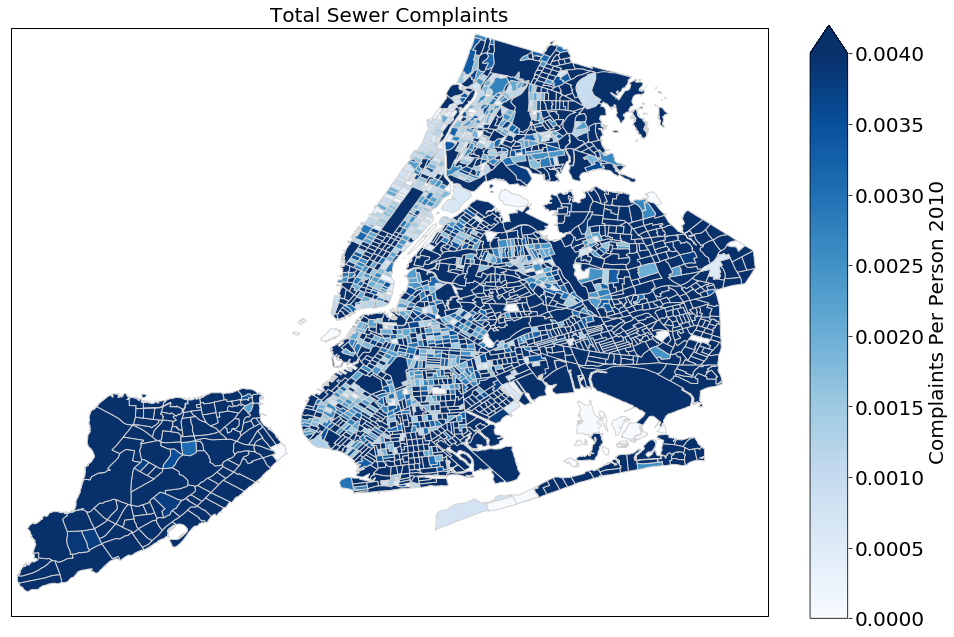

In [38]:
#cmap=mcm.YlOrRd
cmap=mcm.Blues
norm=mcolors.Normalize(vmin=0, vmax=0.004) #vamx is the 50% tile 
#norm=mcolors.Normalize(vmin=0,vmax=tracts['Population'].max())
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"Total Sewer Complaints",fontsize=20)
for _, row in tracts.iterrows():
  
    color = cmap(norm(row['sewer_per_cap']))

    
    ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='lightgrey')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15, extend="max")
cb.ax.tick_params(labelsize=20)
cb.set_label("Complaints Per Person 2010", fontsize=20)

In [39]:
tracts.shape

(2163, 6)

In [40]:
tract1=tracts.dropna(axis=0,how='any')
tract1.shape

(2132, 6)

In [41]:
tract1['sewer_per_cap'].corr(tract1['norm_sewer2010'])

nan

In [42]:
tract1.isnull().sum()

boro_ct201          0
geometry            0
Population          0
sewer_complaints    0
norm_sewer2010      0
sewer_per_cap       0
dtype: int64